In [1]:
# 그래프 한글폰트 깨짐 해결 
## 맨 처음에 다른 코드들 실행하기 전에 현재 셀 실행해서 폰트 설치한 뒤 '런타임 다시 시작' 후 
## 현재 셀은 다시 주석 처리해서 실행하지 말고 다음 셀부터 실행하면 됨

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family']='NanumBarunGothic'
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)

# 관련 라이브러리 임포트
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tools.eval_measures import mse, rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 전처리한 데이터 불러오기
filepath='/content/drive/Shareddrives/팔당댐/combined_data/'
df=pd.read_csv(filepath+'combined_train_test_filled_cleansed.csv', index_col='ymdhm', parse_dates=['ymdhm'])
df

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,0.0,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,0.0,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,0.0,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0


In [6]:
# fw_1018680는 원래 없는 자료이므로 삭제
df.drop('fw_1018680', axis=1, inplace=True)

In [7]:
df.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,25.079251,548.548083,219.425047,24.575537,542.037573,345.631700,329.232797,746.826551,316.071760,312.590404,600.970021,299.979812,1056.807758,0.034074,0.038265,0.035985
std,0.146126,1110.978412,9.912109,9.911699,1104.317316,174.250734,76.559900,1077.388189,67.495669,63.883452,1376.848129,51.442783,1428.279212,0.338607,0.370553,0.360769
min,23.993000,-807.500000,176.380000,2.150000,0.000000,39.000000,259.700000,243.290000,246.200000,247.000000,-3522.710000,241.300000,212.040000,0.000000,0.000000,0.000000
25%,24.980000,127.417500,211.770000,14.670000,132.000000,192.000000,287.700000,319.840000,278.200000,275.000000,205.082500,267.300000,449.120000,0.000000,0.000000,0.000000
50%,25.100000,249.570000,217.630000,26.370000,174.980000,324.000000,307.000000,441.000000,297.200000,295.000000,355.980000,286.300000,679.420000,0.000000,0.000000,0.000000
75%,25.190000,530.000000,229.330000,32.230000,505.000000,487.000000,342.700000,725.690000,330.200000,328.000000,709.710000,316.300000,1142.220000,0.000000,0.000000,0.000000
max,25.449000,25991.500000,241.850000,67.620000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,1080.000000,25289.170000,843.300000,29854.120000,24.000000,21.000000,24.000000


# 변수 적합성 파악
- Granger Causality
- 다중공선성(VIF)

## Granger Causality

In [ ]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False, maxlag=5):

    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)

            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

variables_list=['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630',
                'swl','inf','sfw','ecpc','tototf', 'tide_level',
                'fw_1018662', 'fw_1018683', 'fw_1019630','rf_10184100', 'rf_10184110','rf_10184140']

grangers_causation_matrix(df, variables=variables_list)

,wl_1018662_x,wl_1018680_x,wl_1018683_x,wl_1019630_x,swl_x,inf_x,sfw_x,ecpc_x,tototf_x,tide_level_x,fw_1018662_x,fw_1018683_x,fw_1019630_x,rf_10184100_x,rf_10184110_x,rf_10184140_x
wl_1018662_y,1.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.000,0.0000
wl_1018680_y,0.0,1.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.000,0.0000
wl_1018683_y,0.0,0.0,1.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.000,0.0000
wl_1019630_y,0.0,0.0,0.0,1.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.000,0.0000
swl_y,0.0,0.0,0.0,0.0000,1.0,0.0,0.0000,0.0000,0.0,0.0055,0.0,0.0000,0.0000,0.0000,0.000,0.0001
inf_y,0.0,0.0,0.0,0.0000,0.0,1.0,0.0000,0.0000,0.0,0.0023,0.0,0.0000,0.0000,0.0000,0.000,0.0000
sfw_y,0.0,0.0,0.0,0.0014,0.0,0.0,0.9999,0.0002,0.0,0.0206,0.0,0.0289,0.0011,0.0001,0.000,0.0000
ecpc_y,0.0,0.0,0.0,0.0014,0.0,0.0,0.0000,1.0000,0.0,0.0205,0.0,0.0284,0.0011,0.0001,0.000,0.0000
tototf_y,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,1.0,0.0992,0.0,0.0000,0.0000,0.0000,0.000,0.0000
tide_level_y,0.0,0.0,0.0,0.0000,0.0,0.0,0.0877,0.0889,0.0,1.0000,0.0,0.0000,0.0000,0.0875,0.015,0.0009


## 다중공선성(VIF)

In [ ]:
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif

vif=feature_engineering_XbyVIF(df.drop('wl_1018662',axis=1))
print(vif)

      VIF_Factor      Feature
0   76073.974086          swl
1      41.378578          inf
2   63106.513880          sfw
3     748.827257         ecpc
4      47.093257       tototf
5       5.629266   tide_level
6      17.815411   fw_1018662
7    3292.673677   wl_1018680
8    5443.046576   wl_1018683
9       7.916823   fw_1018683
10   1064.306938   wl_1019630
11     14.149894   fw_1019630
12      1.279141  rf_10184100
13      1.318648  rf_10184110
14      1.401597  rf_10184140


VIF가 10 이상이면 다중공선성이 있다고 해석 <br>
=> 대부분의 변수들에서 다중공선성이 높음 <br>
=> 일부 변수 제거하기에는 다중공선성이 있는 변수가 너무 많으므로 PCA 통해서 차원축소

# log변환
- 최고,최저값의 편차가 매우 큰 변수들 존재
- inf, fw_1018683 => 마이너스 값 존재하므로 (최솟값+1)을 전체에 더한 뒤 log 취해야함
- swl, sfw는 right-skewed, sfw는 쌍봉
- 나머지 변수들은 거의 left-skewed (ecpc, tide_level은 쌍봉)

In [8]:
from tqdm import tqdm

  0%|          | 0/4 [00:01<?, ?it/s]


KeyboardInterrupt: ignored

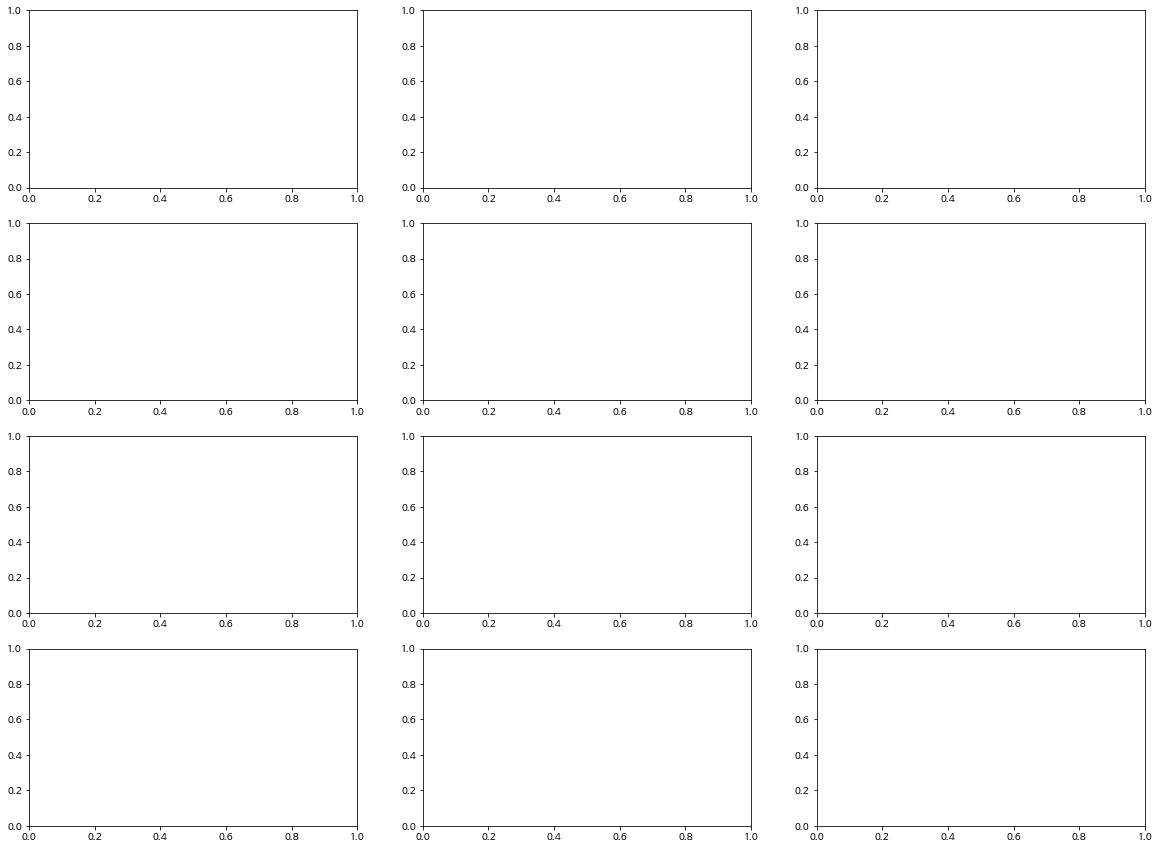

In [9]:
# 로그변환 안한 분포

y_cols=['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']
x_cols=df.drop(y_cols,axis=1).columns

fig,axes=plt.subplots(4,3, figsize=(20,15))
for i in tqdm(range(4)):
  for j in range(3):
    sns.histplot(data=df, x=x_cols[i*3+j], kde=True, ax=axes[i,j])
plt.show()

In [10]:
y_cols=['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']
x_cols=df.drop(y_cols,axis=1).columns

df_log=pd.DataFrame.copy(df)
df_log=df_log.drop(y_cols, axis=1)

# 전체 상용로그변환 (x-min(x)+1) 변환
for i in range(len(x_cols)):
    df_log[x_cols[i]]=np.log10(df_log[x_cols[i]]-min(df_log[x_cols[i]])+1)

# 분포 그래프 다시 확인
fig,axes=plt.subplots(4,3, figsize=(20,15))
for i in tqdm(range(4)):
  for j in range(3):
    sns.histplot(data=df_log, x=x_cols[i*3+j], kde=True, ax=axes[i,j])
plt.show()

In [11]:
df_log.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,0.318255,3.076651,1.632464,1.318418,2.436666,2.398348,2.212317,3.599806,2.676362,0.007738,0.008562,0.008022
std,0.031447,0.183790,0.101238,0.228825,0.437448,0.305310,0.757392,0.112049,0.450240,0.059375,0.062934,0.061100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.298198,2.971238,1.560982,1.130977,2.123852,2.187521,1.889582,3.571568,2.376723,0.000000,0.000000,0.000000
50%,0.323665,3.024514,1.625827,1.401745,2.245463,2.456366,2.298220,3.588797,2.670598,0.000000,0.000000,0.000000
75%,0.341830,3.126618,1.731991,1.492481,2.704151,2.652246,2.684307,3.626691,2.969034,0.000000,0.000000,0.000000
max,0.390228,4.428135,1.822626,1.822626,4.411493,2.905256,3.962054,4.459587,4.471923,1.397940,1.342423,1.397940


In [10]:
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif

vif=feature_engineering_XbyVIF(df_log)
print(vif)

     VIF_Factor      Feature
0    312.689641          swl
1   1431.420095          inf
2   1168.802655          sfw
3     95.222016         ecpc
4    140.225381       tototf
5     65.448356   tide_level
6     46.018933   fw_1018662
7   1619.445958   fw_1018683
8    191.786899   fw_1019630
9      1.441508  rf_10184100
10     1.466831  rf_10184110
11     1.597302  rf_10184140


In [11]:
vif=feature_engineering_XbyVIF(df_log.drop('inf',axis=1))
print(vif)

     VIF_Factor      Feature
0    312.642865          swl
1   1153.559528          sfw
2     93.192692         ecpc
3     74.878437       tototf
4     64.588002   tide_level
5     45.211044   fw_1018662
6   1181.224681   fw_1018683
7    180.631163   fw_1019630
8      1.441315  rf_10184100
9      1.466396  rf_10184110
10     1.597194  rf_10184140


In [12]:
vif=feature_engineering_XbyVIF(df_log.drop(['inf','sfw'],axis=1))
print(vif)

   VIF_Factor      Feature
0  155.288922          swl
1   52.170467         ecpc
2   71.402666       tototf
3   60.048087   tide_level
4   45.106617   fw_1018662
5  462.069564   fw_1018683
6  179.735972   fw_1019630
7    1.441314  rf_10184100
8    1.466273  rf_10184110
9    1.597139  rf_10184140


# train-test

In [12]:
df_scaled=pd.concat([df_log,df[y_cols]], axis=1)
df_train=df_scaled.loc[:'2022-05']
df_tt=df_scaled.loc['2022':]
df_tt

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,0.343802,3.189732,1.636989,1.382377,2.098159,1.633468,1.979321,3.547000,2.415040,0.0,0.0,0.0,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,0.343802,2.969872,1.636989,1.382377,2.098575,1.531479,2.006038,3.564530,2.356580,0.0,0.0,0.0,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,0.343802,2.969742,1.636989,1.382377,2.097604,1.414973,1.979321,3.574717,2.314141,0.0,0.0,0.0,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,0.343802,2.969812,1.636989,1.382377,2.098124,1.301030,1.951143,3.582793,2.291702,0.0,0.0,0.0,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,0.341830,2.907680,1.633266,1.388989,2.098367,1.301030,1.889582,3.587008,2.314141,0.0,0.0,0.0,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.311118,3.028461,1.573800,1.476976,2.415357,2.673942,1.889582,3.486756,2.882729,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,0.311118,3.028961,1.573800,1.476976,2.417405,2.657056,1.855640,3.448151,2.900826,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,0.311118,3.028518,1.573800,1.476976,2.415591,2.640481,2.162146,3.428190,2.918481,0.0,0.0,0.0,299.0,307.0,309.0,310.0


# 최적 하이퍼파라미터 p 찾기
- AIC를 제일 작게 하는 p

In [ ]:
# grid-search
r_min=60
r_max=200
step=20

model=VAR(df_train) # 학습데이터
results_aic=[]
for p in tqdm(range(r_min,r_max+1,step)):
  results=model.fit(p)
  results_aic.append(results.aic)

# order p와 AIC 시각화
sns.set()
plt.plot(list(np.arange(r_min,r_max+1,step)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

# AIC를 최소로 만드는 p
min_aic=min(results_aic)
p=r_min+step*results_aic.index(min_aic)
print(f'=> {r_min}~{r_max} 범위에서 {step} 간격으로 확인한 결과 : "p={p}"에서 AIC 최소')

 38%|███▊      | 3/8 [02:59<05:29, 65.94s/it]

# 모델링

In [13]:
df_forecast=pd.DataFrame(index=df_tt.index, columns=df_tt.columns)
df_forecast

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# 모델 학습 및 y 예측값 df 입력
from tqdm import tqdm

def get_fc_ys(lag, df_train, df_tt, df_fc):
    # 모델 학습
    lag=lag
    var=VAR(df_train)
    fitted_var=var.fit(lag)
    for i in tqdm(range(6912)):
      # df_tt에서 예측하려는 시간 직전 lag개 데이터 가져오기
      forecast_input=df_tt.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)
      # 바로 다음 step 1개 예측
      fc=fitted_var.forecast(y=forecast_input, steps=1)
      # df_fc에 예측한 wl 결과값 추가하기
      y_cols=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
      for name in y_cols:
        col_idx=list(df_fc.columns).index(name)
        df_fc.iloc[4464+i,col_idx]=fc[0][col_idx]
    return df_fc

In [15]:
from sklearn.metrics import r2_score
def get_r2_score(pred,label):
    r2_list = []
    for i in range(4):
        p = pred[:,i]
        l = label[:,i]
        r2_s = r2_score(l,p)
        r2_list.append(r2_s)
    return np.mean(r2_list)

## var(11)

In [47]:
df_forecast11=get_fc_ys(11,df_train,df_tt,df_forecast)
df_forecast11=df_forecast11.loc['2022-06':,y_cols]
df_forecast11

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,280.53354,276.847401,274.780889,268.852763
2022-06-01 00:10:00,281.570383,275.662168,273.755046,267.321433
2022-06-01 00:20:00,283.14448,276.467226,273.384344,264.42106
2022-06-01 00:30:00,285.250734,277.40938,273.553294,261.130905
2022-06-01 00:40:00,285.660281,277.819215,273.788241,258.7996
...,...,...,...,...
2022-07-18 23:10:00,288.392353,292.30233,297.308654,305.837122
2022-07-18 23:20:00,289.411698,302.339871,305.281721,307.990319
2022-07-18 23:30:00,294.756488,306.886448,307.731208,309.421252


In [49]:
# 예측한 데이터
df_submission=df_forecast11
submission_inv_np=df_submission.values

# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values

# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)

# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.237574535492731
RMSE/R2 score : 1.2379178656608685


## var(160)

In [50]:
df_forecast160=get_fc_ys(160,df_train,df_tt,df_forecast)

df_forecast160=df_forecast160.loc['2022-06':,y_cols]
df_forecast160

100%|██████████| 6912/6912 [00:12<00:00, 551.29it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,280.076679,277.299026,274.829438,269.296565
2022-06-01 00:10:00,280.910622,276.060372,273.468005,267.780121
2022-06-01 00:20:00,282.877784,276.700463,273.282162,264.753312
2022-06-01 00:30:00,285.840854,277.511348,273.641532,261.43401
2022-06-01 00:40:00,285.855081,277.979367,273.7699,258.500832
...,...,...,...,...
2022-07-18 23:10:00,288.589587,293.811759,297.778119,306.7575
2022-07-18 23:20:00,290.375008,302.665871,305.266733,308.668551
2022-07-18 23:30:00,295.856688,307.105585,307.786559,310.170355


In [51]:
# 예측한 데이터
df_submission=df_forecast160
submission_inv_np=df_submission.values

# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values

# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)

# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1922611297015389
RMSE/R2 score : 1.19255848595904


## var(230)

In [1]:
df_forecast230=get_fc_ys(230,df_train,df_tt,df_forecast)
df_forecast230=df_forecast230.loc['2022-06':,y_cols]
df_forecast230

NameError: ignored

In [ ]:
# 예측한 데이터
df_submission=df_forecast230
submission_inv_np=df_submission.values

# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values

# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)

# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

# inf,sfw 제외 모델

## 최적 하이퍼파라미터 p 찾기
- AIC를 제일 작게 하는 p

In [17]:
df_train2=df_train.drop(['inf','sfw'], axis=1)
df_tt2=df_tt.drop(['inf','sfw'], axis=1)
df_forecast2=df_forecast.drop(['inf','sfw'], axis=1)

### var(160)

In [18]:
df_forecast160=get_fc_ys(160,df_train2,df_tt2,df_forecast2)

df_forecast160=df_forecast160.loc['2022-06':,y_cols]
df_forecast160

100%|██████████| 6912/6912 [00:07<00:00, 938.67it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.897109,277.391226,274.867957,269.340291
2022-06-01 00:10:00,280.959601,276.133242,273.53619,267.547478
2022-06-01 00:20:00,282.870973,276.62223,273.32635,264.788868
2022-06-01 00:30:00,285.351256,277.443863,273.525262,261.346991
2022-06-01 00:40:00,286.049965,277.973132,273.80413,258.542427
...,...,...,...,...
2022-07-18 23:10:00,288.533255,293.67439,297.756057,306.745581
2022-07-18 23:20:00,290.249951,302.647304,305.147671,308.790993
2022-07-18 23:30:00,295.736304,307.147482,307.855513,310.067378


In [19]:
df_tt.loc['2022-06':,y_cols]

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.0,276.0,274.0,269.0
2022-06-01 00:10:00,281.0,277.0,274.0,267.0
2022-06-01 00:20:00,284.0,277.0,274.0,264.0
2022-06-01 00:30:00,285.0,277.0,274.0,261.0
2022-06-01 00:40:00,284.0,278.0,274.0,259.0
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


In [20]:
# 예측한 데이터
df_submission=df_forecast160
submission_inv_np=df_submission.values

# 정답 데이터
ys_dap_np=df_tt.loc['2022-06':,y_cols].values

# RMSE
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(ys_dap_np, submission_inv_np)**0.5
print('RMSE score :',rmse)

# RMSE/R2
R2=get_r2_score(submission_inv_np,ys_dap_np)
print('RMSE/R2 score :', rmse/R2)

RMSE score : 1.1859174206620258
RMSE/R2 score : 1.18620989684107


# csv 저장

In [22]:
fin_submission=df_submission.reset_index(drop=False)
fin_submission['ymdhm']=fin_submission['ymdhm'].dt.strftime('%Y-%m-%d %H:%M')
fin_submission.set_index('ymdhm', inplace=True)

In [23]:
fin_submission

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,279.897109,277.391226,274.867957,269.340291
2022-06-01 00:10,280.959601,276.133242,273.53619,267.547478
2022-06-01 00:20,282.870973,276.62223,273.32635,264.788868
2022-06-01 00:30,285.351256,277.443863,273.525262,261.346991
2022-06-01 00:40,286.049965,277.973132,273.80413,258.542427
...,...,...,...,...
2022-07-18 23:10,288.533255,293.67439,297.756057,306.745581
2022-07-18 23:20,290.249951,302.647304,305.147671,308.790993
2022-07-18 23:30,295.736304,307.147482,307.855513,310.067378


In [25]:
fin_submission.to_csv('/content/drive/Shareddrives/팔당댐/제출/VAR(160)_log10_(inf_sfw)X.csv')